In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Decompositions Examples

## Singular Value Decomposition (SVD)

In [ ]:
#Calculate SVD
X = torch.rand(10, 20)
U, S, Vh = torch.linalg.svd(X)
V = Vh.T

#Low-dimensional Reconstruction
rd = 5 #Number of (reduced) dimensions to use
X_red = U[:, :rd]@(torch.diag(S)[:rd, :rd])@Vh[:rd, :]

## Principal Component Analysis (PCA)

In [ ]:
#Calculate PCA
X = torch.rand(10, 20)
U, S, V = torch.pca_lowrank(X)

#Low-dimensional Reconstruction
rd = 5 #Number of (reduced) dimensions to use
X_red = U[:, :rd]@(torch.diag(S)[:rd, :rd])@V.T[:rd, :]

## Dynamic Mode Decomposition (DMD)

In [ ]:
#DMD Calculation
X = torch.rand(10, 20)
X_a = X[:-1]
X_b = X[1:]

#Take SVD
U, S, Vh = torch.linalg.svd(X_a)
#Reduce Order
r = 3
U_r = U[:, :r]
V_r = Vh[:r, :].T
S_i = torch.inverse(torch.diag(S[:r]))
#Transform A
A_tilde = U_r.T@X_a@V_r@S_i
#Eigendocomposition of A
lam, W = torch.eig(A_tilde, True)
#Transform back, get DMD Modes
Phi = X_b@V_r@S_i@W

#Clustering Methods

## K Means Clustering

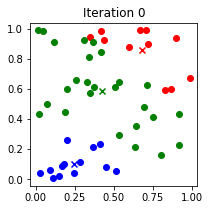

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

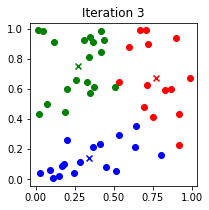

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

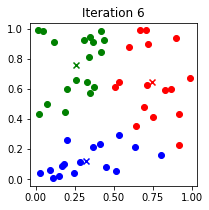

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

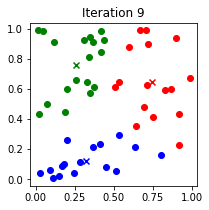

In [ ]:
# K means clustering
x = torch.rand(50, 2)
K = 3 #Define K ahead of time
Niter = 10 # Defne number of mean update iterations
N, D = x.shape  # Number of samples, dimension of the ambient space

c = x[:K, :].clone()  # Simplistic initialization for the centroids

x_i = torch.Tensor(x.view(N, 1, D))  # (N, 1, D) samples
c_j = torch.Tensor(c.view(1, K, D))  # (1, K, D) centroids

for i in range(Niter):

  # E step: assign points to the closest cluster -------------------------
  D_ij = ((x_i - c_j) ** 2).sum(-1)  # (N, K) symbolic squared distances
  cl = D_ij.argmin(dim=1).long().view(-1)  # Points -> Nearest cluster

  # M step: update the centroids to the normalized cluster average: ------
  # Compute the sum of points per cluster:
  c.zero_()
  c.scatter_add_(0, cl[:, None].repeat(1, D), x)

  # Divide by the number of points per cluster:
  Ncl = torch.bincount(cl, minlength=K).type_as(c).view(K, 1)
  c /= Ncl  # in-place division to compute the average

  plt.figure(figsize = (3,3));
  if i%3 == 0:
    cs = ['r', 'g', 'b']
    for j in range(K):
      mask = cl == j
      plt.scatter(x[:, 0][mask], x[:,1][mask], c = cs[j]);
      plt.title(f'Iteration {i}')
      plt.scatter(c[j, 0], c[j, 1], c = cs[j], marker = 'x');

## K Nearest Neighbors

In [ ]:
# K Nearest Neighbor
#Generate Two classes
data_0 = torch.normal(torch.zeros(50, 2), 0.5*torch.ones(50,2))
labels_0 = torch.zeros(50).long()
data_1 = torch.normal(torch.ones(50, 2), 0.5*torch.ones(50, 2))
labels_1 = torch.ones(50).long()

full_data = torch.vstack((data_0, data_1))
labels = torch.cat((labels_0, labels_1))
print(labels.shape)
print(full_data.shape)
mask=labels.bool()



torch.Size([100])
torch.Size([100, 2])
tensor([False, False, False, False, False, False, False, False, False, False])


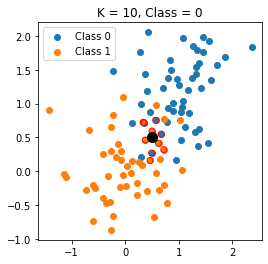

In [ ]:
# K Nearest Neighbor
#Generate Two classes
data_0 = torch.normal(torch.zeros(50, 2), 0.5*torch.ones(50,2))
labels_0 = torch.zeros(50).long()
data_1 = torch.normal(torch.ones(50, 2), 0.5*torch.ones(50, 2))
labels_1 = torch.ones(50).long()

full_data = torch.vstack((data_0, data_1))
labels = torch.cat((labels_0, labels_1))
mask = labels.bool()

#Test Data Point
test_point = torch.Tensor([[0.5,0.5]])

#Find distances
K = 10
dist = torch.norm(test_point - full_data, dim = 1)
k_dists, k_idcs = torch.topk(dist, k =K,  largest = False)
label = torch.argmax(torch.bincount(labels[k_idcs]))

plt.figure(figsize = (4,4))

#Plot each class
for l in [0,1]:
  d_mask = mask!=bool(l)
  plt.scatter(full_data[d_mask][:,0], full_data[d_mask][:, 1], 
              label = f'Class {l}')
#Highlight K nearest neighbors
for k_idx in k_idcs:
  plt.scatter(full_data[k_idx, 0], full_data[k_idx, 1], 
              facecolors = 'none', edgecolors= 'r')
plt.scatter(test_point[:, 0], test_point[:, 1], c = 'k', s = 100)
plt.title(f'K = {K}, Class = {label}')
plt.legend()

# Example: Mall Customer Clustering

Source: https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms/data

In [ ]:
import pandas as pd
import seaborn as sns

import os
import warnings

warnings.filterwarnings('ignore')
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/amath 563/labs/8"))

['Lab_8_AMATH_Decomposition.ipynb', 'Mall_Customers.csv', 'CC GENERAL.csv']


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amath 563/labs/8/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


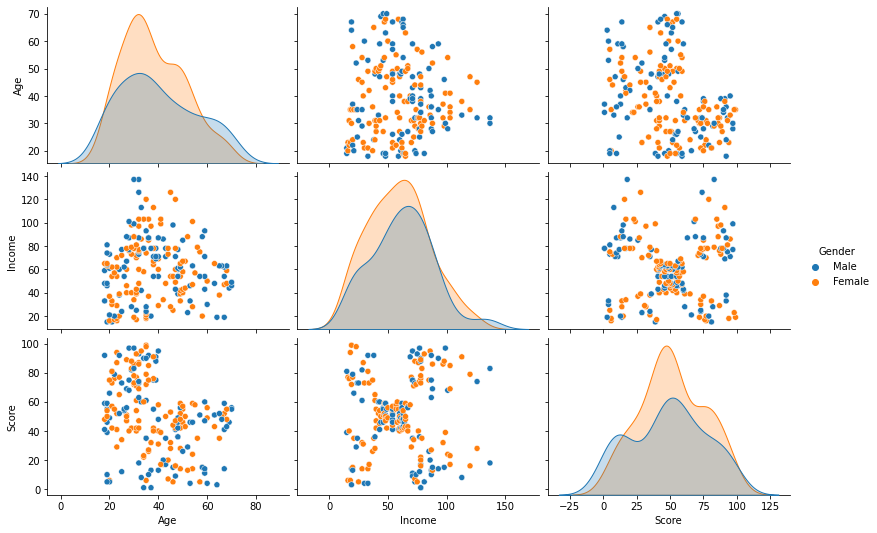

In [ ]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

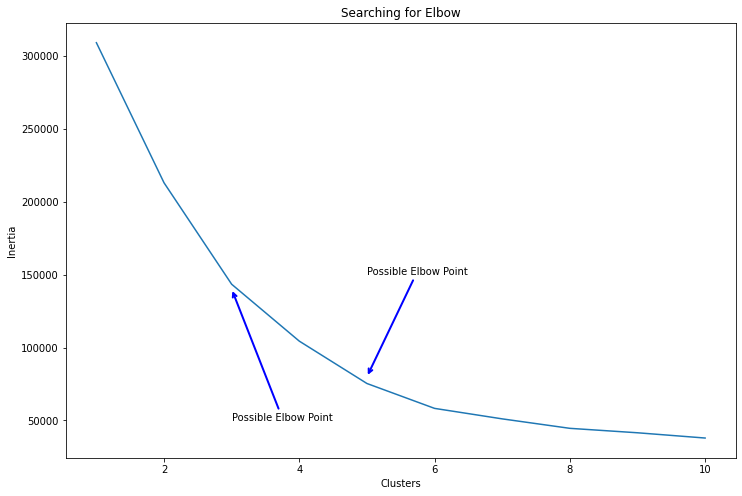

In [ ]:
# For K means clustering, we can use sklearn.cluster.Kmeans

from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

To select which value of k to use, we compare some loss function (here it is labelled inertia, which is the square distance from the centroid for each class) as a function of k. We are looking for an "elbow", where increasing k beyond that has a diminishing return. Here, we see that either k=3 or k=5 are good candidates.

## Visualizing Clusters

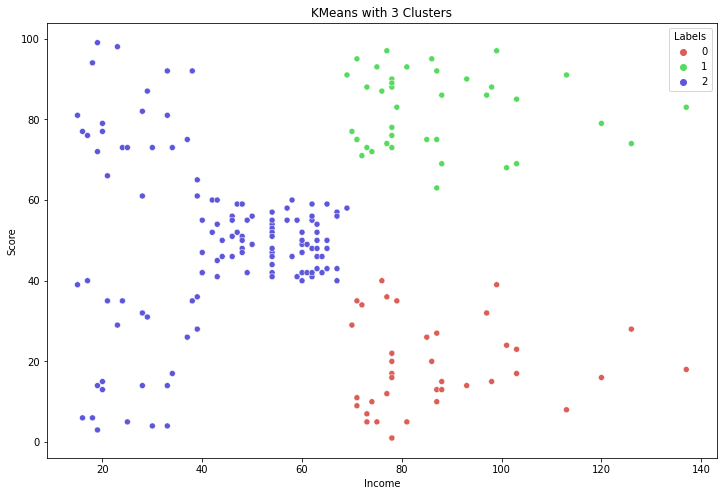

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

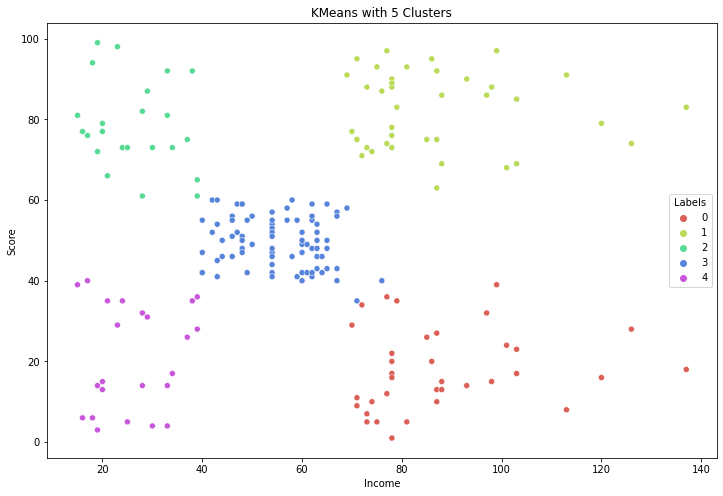

In [ ]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

Label 0 is low income and low spending \\
Label 1 is high income and high spending \\
Label 2 is mid income and mid spending \\
Label 3 is high income and low spending \\
Label 4 is low income and high spending

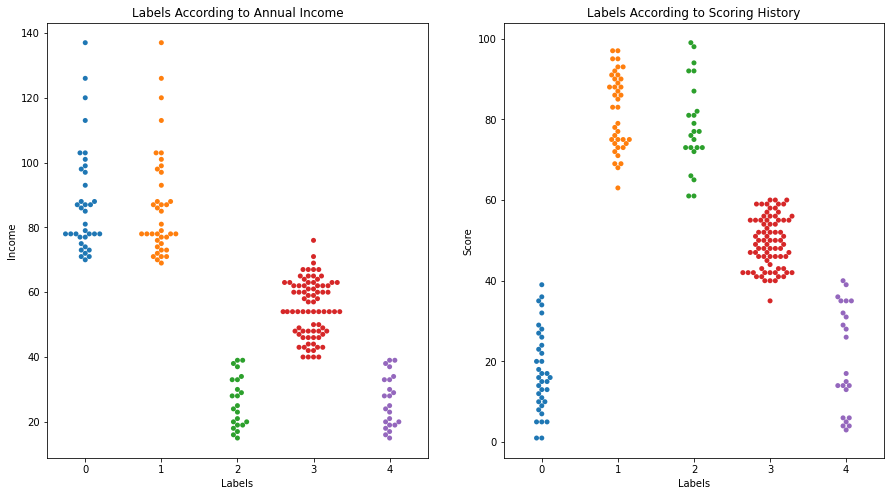

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

# Assignment: Clustering and Classification of Credit Card Users

In [3]:
import pandas as pd
import seaborn as sns

import os
import warnings

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amath 563/labs/8/CC GENERAL.csv')
df=df.drop(['CUST_ID'],axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


When processing data with many different scales, you should normalize each dimension so that it has mean 0 and Variance 1.

## Your task
1. Normalize each dimension of the data and split into train set (8000) and test set (1000)
2. Use k-means clustering to separate the customers into k groups
3. Find the "elbow" of the intertia vs. k plot to find the best value of k
4. Can you define what each of the clusters represents?
5. Take the PCA and SVD Decompositions of your training data and take the r-dimensional (choose r <=5) projection in these spaces.
6. Transform the coordinates of your k centroids to the new space defined by the PCA and SVD.
7. For the test set, classify each data point by the nearest centroid in a) the original (full) coordinates, b) the PCA coordinates, c) the SVD coordinates
8. Use the original (full) coordinates as "truth", generate a confusion matrix for each of the other spaces. Which classes were most and least affected by coordinate transforms?

## Task 1
>Normalization

In [4]:
# see how many data attributes are corrupted, and replace them by median values
# in this case MINIMUM_PAYMENTS, and CREDIT_LIMIT
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.loc[df['MINIMUM_PAYMENTS'].isna(), ['MINIMUM_PAYMENTS']] = df['MINIMUM_PAYMENTS'].median()
df.loc[df['CREDIT_LIMIT'].isna(), ['CREDIT_LIMIT']] = df['CREDIT_LIMIT'].median()
# Now check that no data is corrupted
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
# Normalize the data
X=np.array(df)
N,D = X.shape

scaler =StandardScaler()
norm_X= scaler.fit_transform(X)

## split train and test
train_X = norm_X[:8000]
test_X =norm_X[8000:]

print(train_X.shape)
print(test_X.shape)

(8000, 17)
(950, 17)


## Task 2, 3, 4
> K means clustering<br> Find best value of k by inertia 'elbow' and k plot<br>
Could be k=3 or 5

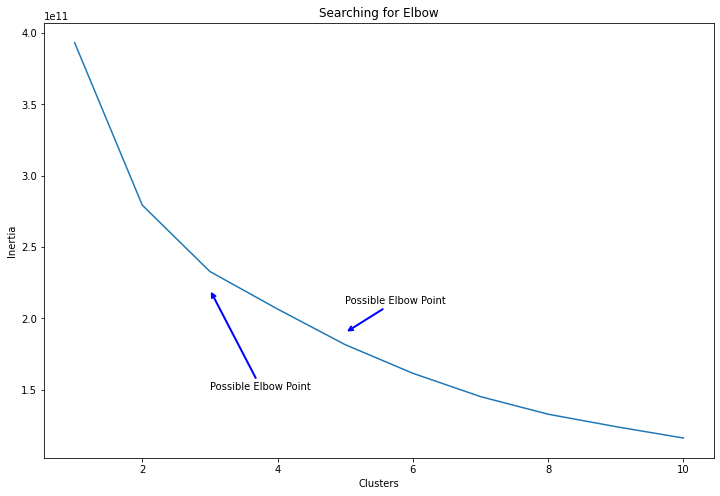

In [7]:
# For K means clustering, we can use sklearn.cluster.Kmeans

from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 2.2e11), xytext=(3, 1.5e11), xycoords='data',          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible Elbow Point', xy=(5, 1.9e11), xytext=(5,2.1e11), xycoords='data',          
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


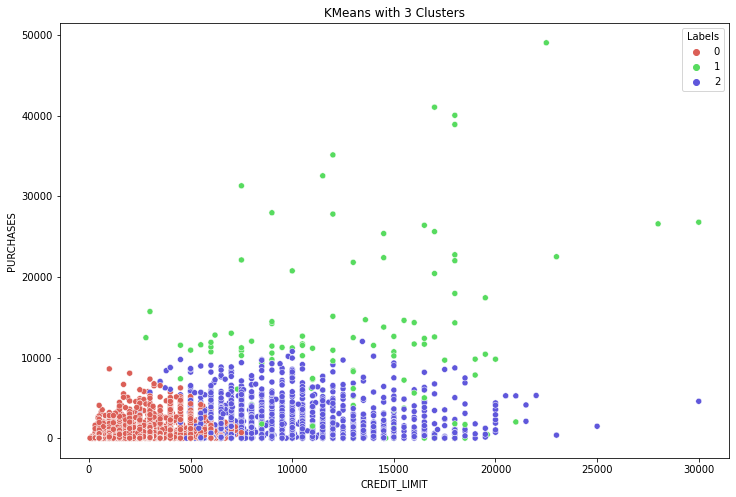

In [8]:
# 3 cluster plot on credit limit and purchases
km3 = KMeans(n_clusters=3).fit(X)

df['Labels']= km3.labels_


plt.figure(figsize=(12, 8))
sns.scatterplot(df['CREDIT_LIMIT'], df['PURCHASES'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

> From this 3 clusters plot, we can see the 3 separated groups:<br>
* Label 0: less credit limit, less spending
* Label 1: medium to high credit limit, high spending
* Label 2: medium to high credit limit, less spending


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


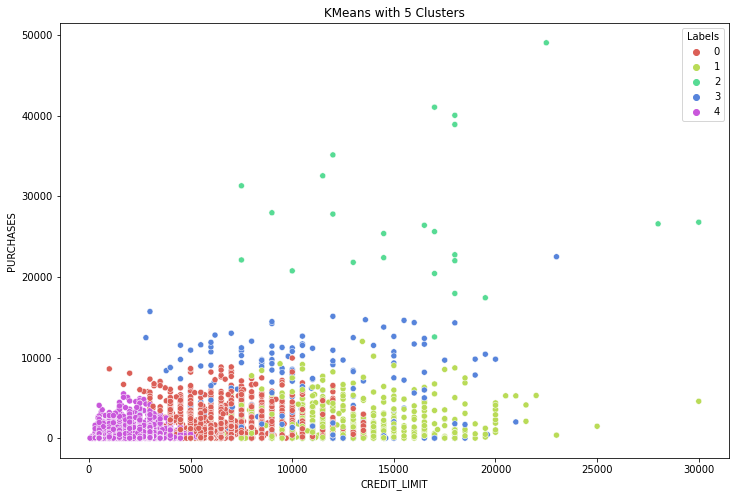

In [96]:
# 5 cluster plot on credit limit and purchases
km5 = KMeans(n_clusters=5).fit(X)

df['Labels']= km5.labels_


plt.figure(figsize=(12, 8))
sns.scatterplot(df['CREDIT_LIMIT'], df['PURCHASES'], hue=df['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

> From this 5 clusters plot, we can see the 5 separated groups:<br>
* Label 0: medium credit limit, less spending
* Label 1: medium to high credit limit, high spending
* Label 2: less credit limit, less spending
* Label 4: high credit limit, meidum to less spending
* Label 3: only a few present, could be noisy data

We see that k=3 and k=5 both give good separations. However, it is safer to say there are 5 clusters, because we only plot 2 variables now. Things could be more complex in reality. So I choose k=5 be the best value.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; y

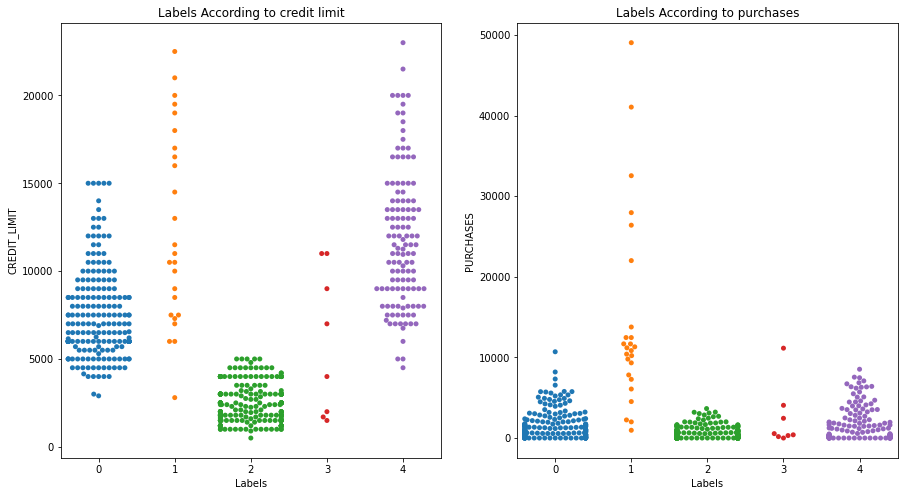

In [214]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

sns.swarmplot(x='Labels', y='CREDIT_LIMIT', data=df[:600], ax=ax)
ax.set_title('Labels According to credit limit')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='PURCHASES', data=df[:600], ax=ax)
ax.set_title('Labels According to purchases')

plt.show()

## Task 5
> SVD and PCA

In [26]:
#Calculate SVD
XX = torch.Tensor(train_X)
U1, S1, Vh1 = torch.linalg.svd(XX)
V1 = Vh1.T

#Low-dimensional Reconstruction
rd1 = 5 #Number of (reduced) dimensions to use
X_red1 = U1[:, :rd1]@(torch.diag(S1)[:rd1, :rd1])@Vh1[:rd1, :]

In [21]:
#Calculate PCA
U2, S2, V2 = torch.pca_lowrank(XX)

#Low-dimensional Reconstruction
rd2 = 5 #Number of (reduced) dimensions to use
X_red2 = U2[:, :rd2]@(torch.diag(S2)[:rd2, :rd2])@V2.T[:rd2, :]

## Task 6
> Centorids

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


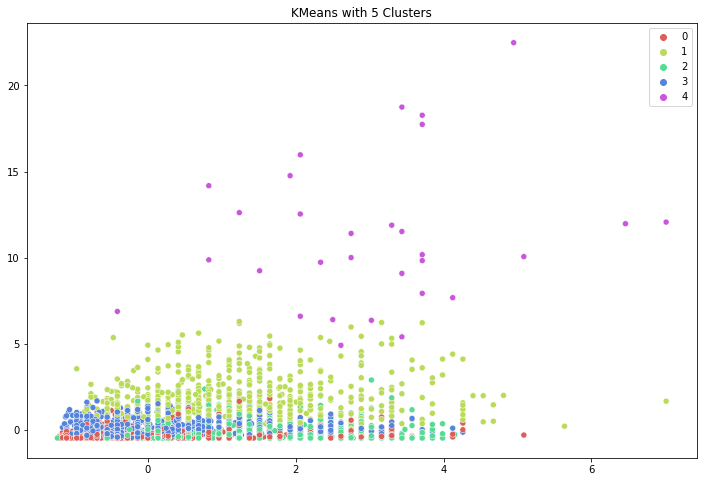

In [99]:
km5 = KMeans(n_clusters=5).fit(train_X)
labels = km5.labels_
centers =km5.cluster_centers_  # original centers found by K means

plt.figure(figsize=(12, 8))
sns.scatterplot(train_X[:,-5], train_X[:,2], hue=labels, 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

In [100]:
# To transform the centers to SVD space
svd_cent=torch.zeros((5,17))

## sum the coordinate for each label
svd_cent.scatter_add_(0, torch.tensor(labels[:,None],dtype=torch.int64).repeat(1,17),X_red1)

## get the number of each label
Ncl = torch.bincount(torch.tensor(labels,dtype=torch.int64), minlength=5).type_as(svd_cent).view(5, 1)
svd_cent /= Ncl  # in-place division to compute the average

print(centers[:,:3])
print(svd_cent[:,:3])


[[-0.21472278 -0.2814136  -0.34279302]
 [ 0.56931552  0.46091832  1.82231007]
 [ 1.56245257  0.392229   -0.23592797]
 [-0.33802996  0.20389392  0.03068562]
 [ 1.92305052  0.33771687 11.21204182]]
tensor([[-0.1581, -0.3459, -0.3621],
        [ 0.5332,  0.6688,  1.9413],
        [ 1.4301,  0.5081, -0.1824],
        [-0.3441,  0.2060,  0.0655],
        [ 2.6274, -1.3695,  9.5422]])


In [101]:
# To transform the centers to PCA space
pca_cent=torch.zeros((5,17))

## sum the coordinate for each label
pca_cent.scatter_add_(0, torch.tensor(labels[:,None],dtype=torch.int64).repeat(1,17),X_red2)

## get the number of each label
pca_cent /= Ncl  # in-place division to acompute the average

print(centers[:,:3])
print(pca_cent[:,:3])


[[-0.21472278 -0.2814136  -0.34279302]
 [ 0.56931552  0.46091832  1.82231007]
 [ 1.56245257  0.392229   -0.23592797]
 [-0.33802996  0.20389392  0.03068562]
 [ 1.92305052  0.33771687 11.21204182]]
tensor([[-0.1215, -0.2634, -0.4835],
        [ 0.4169,  0.5538,  1.9370],
        [ 1.3144,  0.3389, -0.1902],
        [-0.4978,  0.0592,  0.1111],
        [ 3.8892,  0.7632,  8.6761]])


## Task 7
> Classify test data

In [102]:
# a) by original full coordinates
test_cluster_labels = km5.fit_predict(test_X)


In [103]:
# b) by svd coordinates
test_X = torch.Tensor(test_X)
N,D = test_X.shape

I = test_X.view(N,1,D)
J = svd_cent.view(1,5,D)

D_IJ = ((I-J)**2).sum(-1)
svd_cluster_labels = D_IJ.argmin(dim=1).long().view(-1)

In [104]:
# c) by pca coordinates

I = test_X.view(N,1,D)
J = pca_cent.view(1,5,D)

D_IJ = ((I-J)**2).sum(-1)
pca_cluster_labels = D_IJ.argmin(dim=1).long().view(-1)

## Task 8
> Confusion matrices

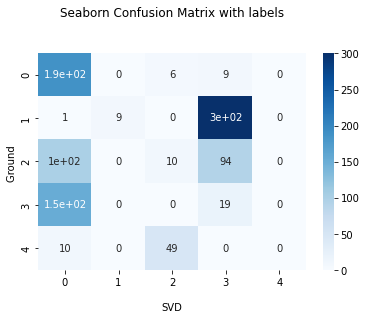

In [105]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test_cluster_labels, svd_cluster_labels)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nSVD')
ax.set_ylabel('Ground ');

## Display the visualization of the Confusion Matrix.
plt.show()

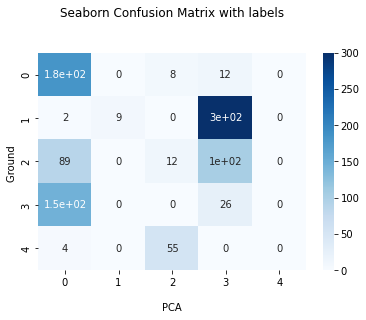

In [106]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(test_cluster_labels, pca_cluster_labels)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPCA')
ax.set_ylabel('Ground ');

## Display the visualization of the Confusion Matrix.
plt.show()